# Exploratory Data Analysis of European Sales Dataset

In [ ]:
library(corrplot)

In [ ]:
# We are getting the data and looking at the first five records.

In [ ]:
europeanSalesData<-read.csv("EuropeanSales.csv",header=T)

head(europeanSalesData,5)

In [ ]:
# Summarize the dataset

In [ ]:
summary(europeanSalesData)

In [ ]:
#Correlation between Attributes

corrs = cor(europeanSalesData[,-1])
corrplot(corrs, type = "full", method="ellipse", tl.col="black", tl.srt = 30, addCoef.col = "black")

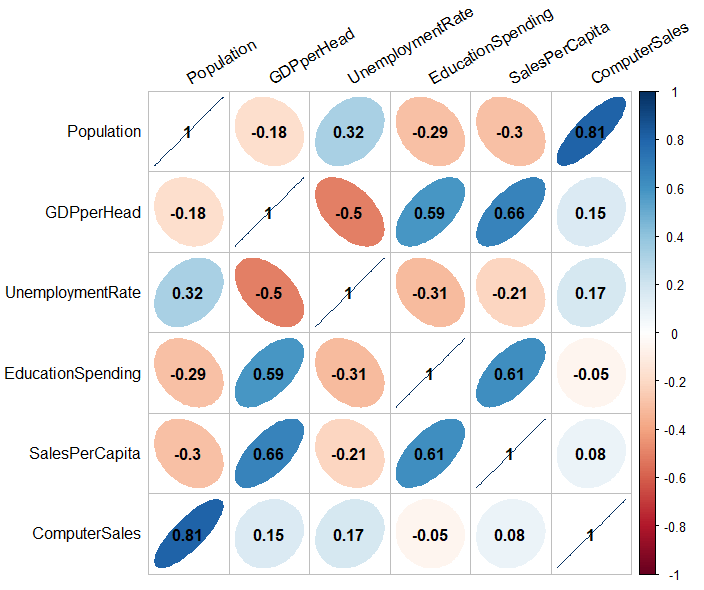

In [ ]:
# According to Correlation Matrix, SalesPerCapita is most correlated with GDPperHead and Educatian Spending.

# ComputerSales is most correlated with Population.

In [ ]:
#SalesPerCapita

# Starting with the Kitchen Sink Model for SalesPerCapita, so we will build a model with all features.
# Fit the Data with all Attributes to the model

In [ ]:
model <- lm(SalesPerCapita ~ Population + GDPperHead + UnemploymentRate + EducationSpending + ComputerSales, data=europeanSalesData)
summary(model)

In [ ]:
# It seems attrbiutes don't show strong correlation with SalesPerCapita. Adjusted R-Squared is not bad but T-Values are not significant for the kitchen sink model.

# When we try the other combinations with starting eliminate insignificant features ( like UnenployementRate), 
# we can see that best model for SalesPerCapita includes only 2 features 
# (GDPperHead and EducationSpending are enough to cover nearly %50 of data).

In [ ]:
model <- lm(SalesPerCapita ~ GDPperHead + EducationSpending, data=europeanSalesData)
summary(model)

In [ ]:
# Adjusted R-Squared is still close (above %46) to the Kitchen sink model and 
# T-Values are more significant than Kitchen Sink. Also we prefered the simplest model if their scores are similar. 
# (It includes only 2 features)

# So the result is SalesPerCapita ~ GDPperHead + EducationSpending

In [ ]:
# ComputerSales

# Starting with the Kitchen Sink Model for ComputerSales, so we will build a model with all features.
# Fit the Data with all Attributes to the model

In [ ]:
model <- lm(SalesPerCapita ~ Population + GDPperHead + UnemploymentRate + EducationSpending + ComputerSales, data=europeanSalesData)
summary(model)

In [ ]:
# It seems some attributes don't show strong correlation with ComputerSales. 
# Adjusted R-Squared is not bad  (%70) but  some T-Values are not significant for the kitchen sink model.

# Eliminate starting with most insignificant features (like UnenployementRate), 

In [ ]:
model <- lm(ComputerSales ~ Population + GDPperHead  + EducationSpending + SalesPerCapita, data=europeanSalesData)
summary(model)

In [ ]:
# Eliminate most insignificant features (like EducationSpending), 
model <- lm(ComputerSales ~ Population + GDPperHead   + SalesPerCapita, data=europeanSalesData)
summary(model)

In [ ]:
# Eliminate most insignificant features (like GDPperHead), 
model <- lm(ComputerSales ~ Population + SalesPerCapita, data=europeanSalesData)
summary(model)

In [ ]:
# We can see that best model for ComputerSales includes only 2 features (Population and SalesPerCapita).

# Adjusted R-squared is more than previous models and all features statistically significant.

# So the result is ComputerSales ~ Population + SalesPerCapita